Myil Vaughanan V L<br>
19BTRCR007

## <center>LAB PROGRAM 5

<b>1.	Assume 4- binary digit accuracy for the following computations. <br>
a)	Write out the binary representation for the approximate value of 6/7. <br>
b)	Write out the binary representation for the approximate value of 1/7. <br>
c)	Add the two binary representations obtained above, and convert back to the decimal representation. <br>
d)	Compare the result of part (c) with the result from adding the binary representations of 6 and 1, followed by division by the binary representation of 7.
</b>

install.packages("R.utils")

In [63]:
library(R.utils)
#install.packages("stringr")
# library(stringr)

In [74]:
a <- 6/7
float2Bin<- function(x)
{
  int_part<- floor(x)
  dec_part<- x-int_part
  int2bin<- intToBin(int_part)
  dec2bin<- str_pad(intToBin(dec_part*2^31),31,pad='0') #O.o
  paste0(int2bin,".",dec2bin)
}
float2Bin(a)

[1] "0.1101101101101101101101101101101"

In [75]:
b<- 1/7
float2Bin(b)

[1] "0.0010010010010010010010010010010"

In [79]:
sum = a + b
answer <- as.binary(sum)
answer

[1] 1

In [127]:
new_a <- as.binary(6)
new_b <- as.binary(1)
new_sum <- new_a + new_b

# Just comparing the answer in (c) with the binary sum of 6 + 1
answer   # previous answer
new_sum  # binary sum of 6 and 1

[1] 1

[1] 1 1 1

In [134]:
# followed by division of binary number of 7
divided_new_sum = as.integer(new_sum) / 7
as.binary(divided_new_sum)

[1] 1

<b>2.	In R, evaluate the expressions	<br>
2^52 + k – 2^52 <br>
2^53 + k – 2^53 <br>
2^54 + k – 2^54, <br>
for the cases where k = 1, 2, 3, 4. Explain what you observe. What could be done to obtain results in R which are mathematically correct?
</b>

<u>Answer</u> We can make use of functions

In [164]:
# before getting correctly
func <- function(k){
print(2^52 + k - 2^52)
print((2^53) + k - (2^53))
print(2^54 + k - 2^54)
}

func(c(1,2,3,4))

[1] 1 2 3 4
[1] 0 2 4 4
[1] 0 0 4 4


install.packages('bit64')

library(bit64)

In [39]:
# after manipualting to integer64
a <- as.integer64(2**52)
func <- function(k){
print(a + k - a)
print(a*2 + k - a*2)
print(a*4 + k - a*4)
}

func(c(1,2,3,4))

integer64
[1] 1 2 3 4
integer64
[1] 1 2 3 4
integer64
[1] 1 2 3 4


<b>3.	The following are a sample of observations on incoming solar radiation at a greenhouse: <br>
11.1 10.6 6.3 8.8 10.7 11.2 8.9 12.2 <br>
a)	Assign the data to an object called solar.radiation. <br>
b)	Find the mean, median, range, and variance of the radiation observations. <br>
c)	Add 10 to each observation of solar.radiation, and assign the result to sr10. Find the mean, median, range, and variance of sr10. Which statistics change, and by how much?<br>
d)	Plot a histogram of the solar.radiation, sr10.
</b>

In [90]:
solar.radiation <- c(11.1,10.6, 6.3, 8.8, 10.7, 11.2, 8.9, 12.2)
solar.radiation

[1] 11.1 10.6  6.3  8.8 10.7 11.2  8.9 12.2

In [94]:
cat("Mean:", mean(solar.radiation))
cat("\nMedian:", median(solar.radiation))
cat("\nRange:", range(solar.radiation))
cat("\nVariance:", var(solar.radiation))

Mean: 9.975
Median: 10.65
Range: 6.3 12.2
Variance: 3.525

In [96]:
# added 10 to each element
sr10 <- solar.radiation + 10
sr10

[1] 21.1 20.6 16.3 18.8 20.7 21.2 18.9 22.2

In [97]:
cat("Mean:", mean(sr10))
cat("\nMedian:", median(sr10))
cat("\nRange:", range(sr10))
cat("\nVariance:", var(sr10))

Mean: 19.975
Median: 20.65
Range: 16.3 22.2
Variance: 3.525

<u>Answer:-</u> 
* Statistics of mean, median and range have changed and the variance value hasn't changed
* Mean, median and range have changed by +10

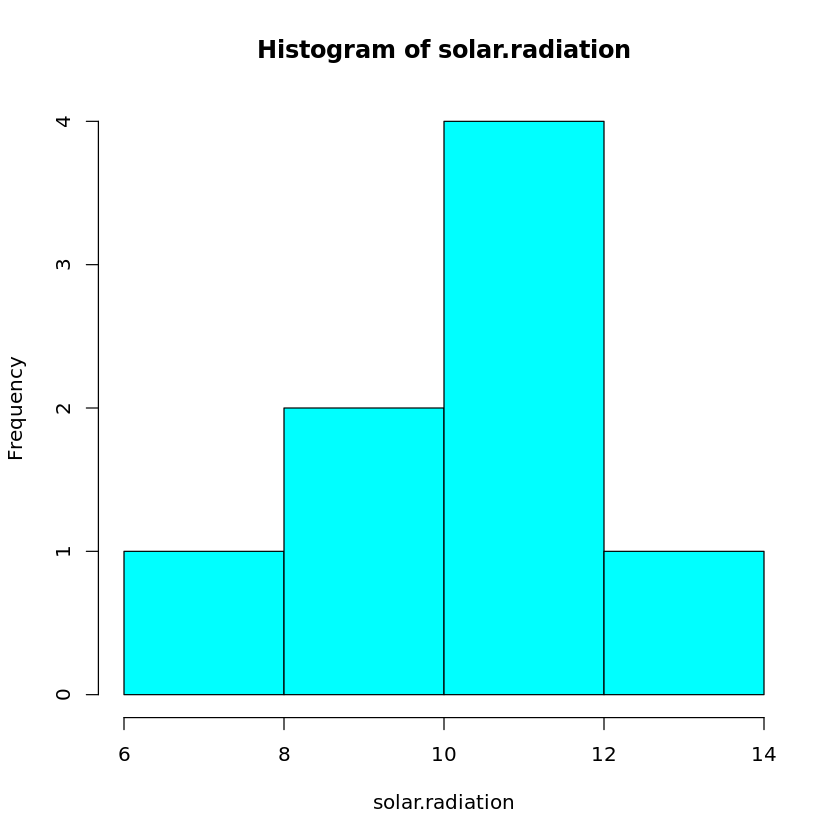

In [100]:
hist(solar.radiation, col ='cyan')

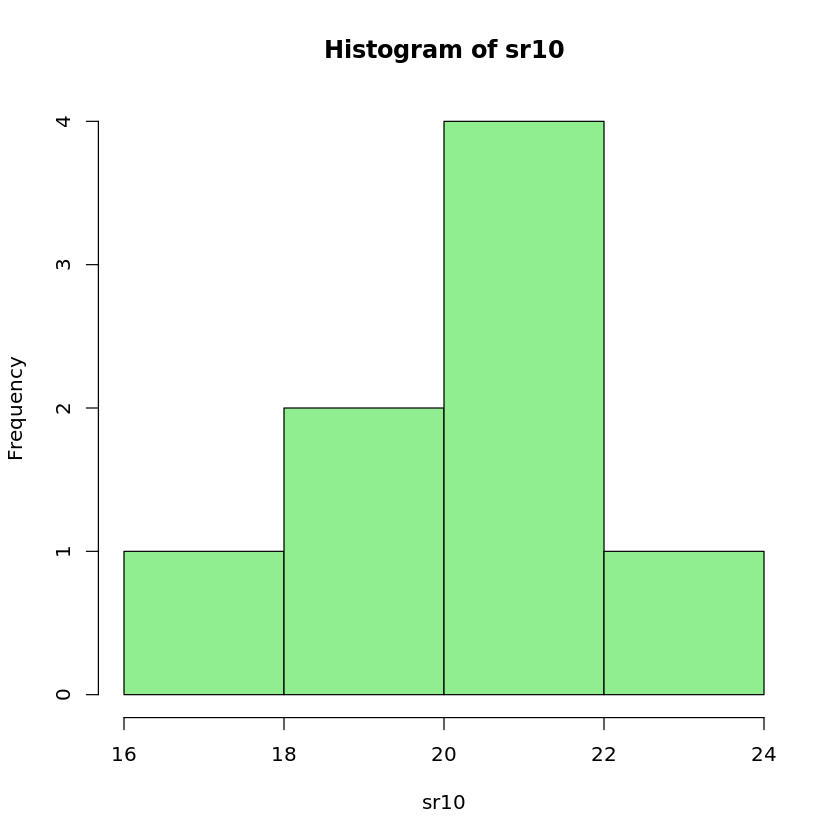

In [102]:
hist(sr10,col = 'light green')

#### 4.	Venn diagrams can be used to illustrate set unions and intersections. Draw Venn diagrams that correspond to and, or, not, and xor operations.

install.packages("BiocManager")

BiocManager::install("limma")

library(limma)

In [106]:
hsb2 <- read.csv("https://stats.idre.ucla.edu/wp-content/uploads/2016/02/hsb2-3.csv") 
attach(hsb2)
hw <- (write >= 60)
hm <- (math >= 60)
hr <- (read >= 60)
c3 <- cbind(hw, hm, hr)

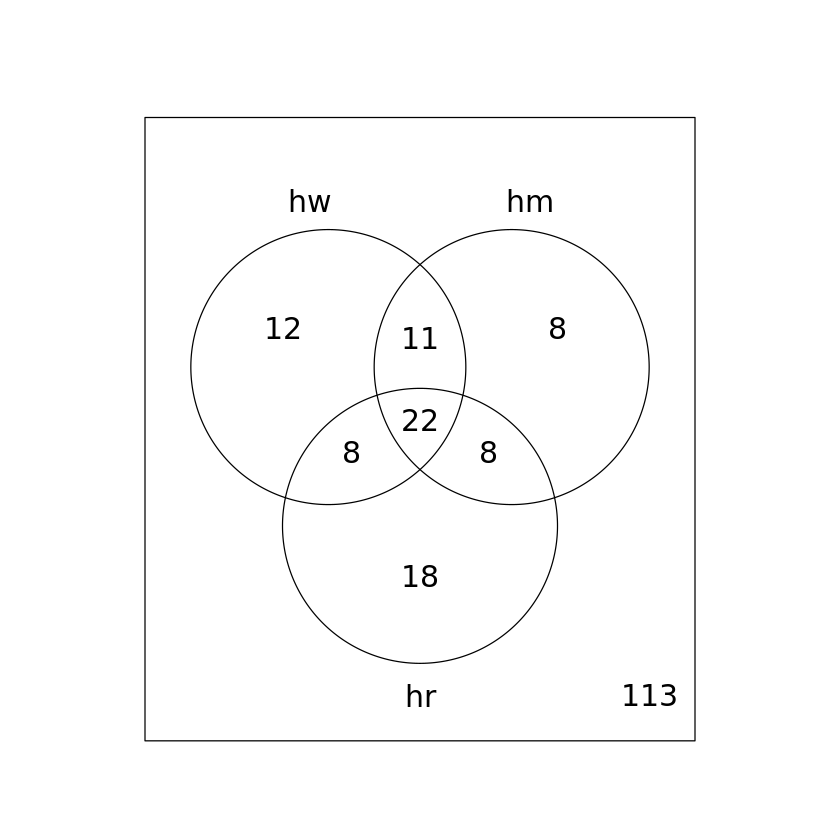

In [108]:
a <- vennCounts(c3)
vennDiagram(a)

<b>5.	Consider the built-in data frame cars.

a)	Consult the help page to determine the number of observations in the dataset as well as the number of variables. Also, what are the names of the variables?

b)	Find the mean stopping distance for all observations for which the speed was 20 miles per hour.
    
c)	Construct a scatterplot relating stopping distance to speed. What kind of relationship do you observe?
</b>

In [190]:
df <- datasets::cars
head(df)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


In [166]:
# we can use dim() or nrow() to find the number of observations 
nrow(df)  # here we have 50 observations in this dataframe

[1] 50

In [172]:
# finding the names of the column
colnames(df)

[1] "speed" "dist"

In [183]:
new_df <- df[df['speed'] == 20]
print(new_df)

 [1] 20 20 20 20 20 32 48 52 56 64


In [184]:
mean(new_df)  # mean stopping distance when speed is equal to 20

[1] 35.2

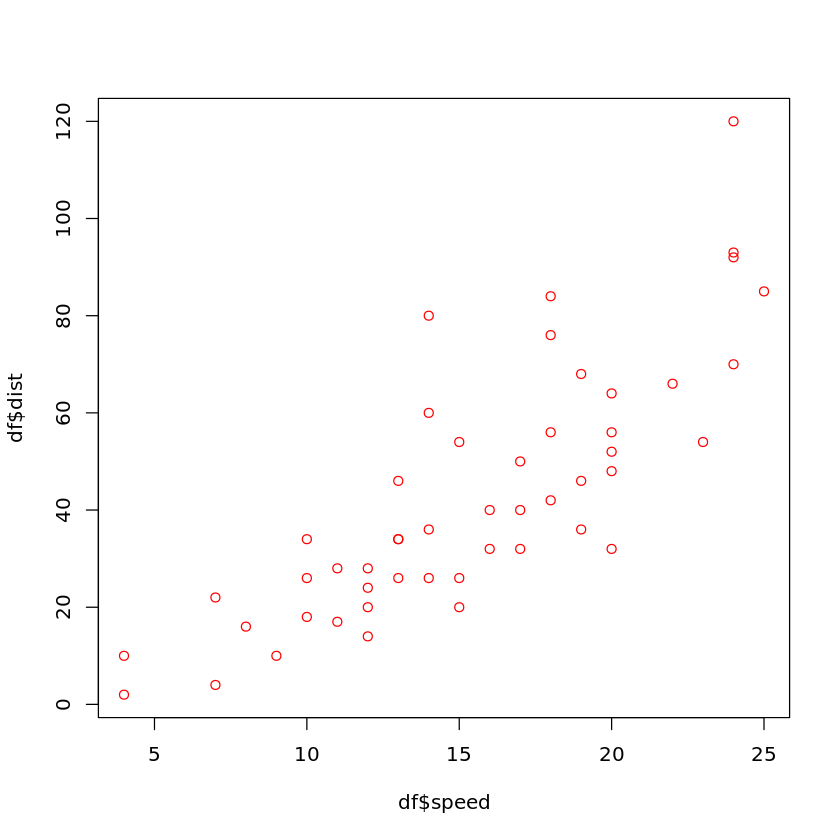

In [193]:
plot(df$speed, df$dist, col='red')

<i>Conclusions that can be made from the plot:</i>
* We observe that there is a linear realtionship between speed and stopping distance